In [115]:
from pygsp import graphs, filters
import numpy as np  
import matplotlib.pyplot as plt

In [116]:
rs = np.random.RandomState(42)

In [117]:
n = 25
D = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            D[i,j] = rs.randint(1, 10)

A = np.zeros((n,n))
for i in range(n):
    degree = int(D[i,i])
    links_created = 0
    while links_created < degree:
        link = rs.randint(0, n)
        if link != i and A[i, link] == 0:
            A[i, link] = 1
            links_created += 1
L = D - A
GL = graphs.Graph(L)


2024-12-12 00:27:13,454:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [118]:
def plot_matrices(D, A, L,annot=True):   
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(D, cmap='coolwarm')
    for (i, j), val in np.ndenumerate(D):
        if i == j and val > 0:
            if annot:
                ax[0].text(j, i, int(val), ha='center', va='center', color='white')
        elif i != j:
            ax[0].images[0].get_array()[i, j] = np.nan
    ax[0].set_title('Matrix Diagonal')
    fig.colorbar(ax[0].images[0], ax=ax[0])

    ax[1].imshow(A, cmap='Greys')
    for (i, j), val in np.ndenumerate(A):
        if val > 0:
            if annot:
                ax[1].text(j, i, int(val), ha='center', va='center', color='white')
                ax[1].text(j, j, 0, ha='center', va='center', color='black')
    ax[1].set_title('Matrix Adjacency')
    fig.colorbar(ax[1].images[0], ax=ax[1])

    ax[2].imshow(L, cmap='viridis')
    for (i, j), val in np.ndenumerate(L):
        if i == j:
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='white')
        elif val == 0:
            ax[2].images[0].get_array()[i, j] = np.nan
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='white')
        elif val == -1:
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='black')

    ax[2].set_title('Laplacian Matrix')
    fig.colorbar(ax[2].images[0], ax=ax[2])

    plt.show()

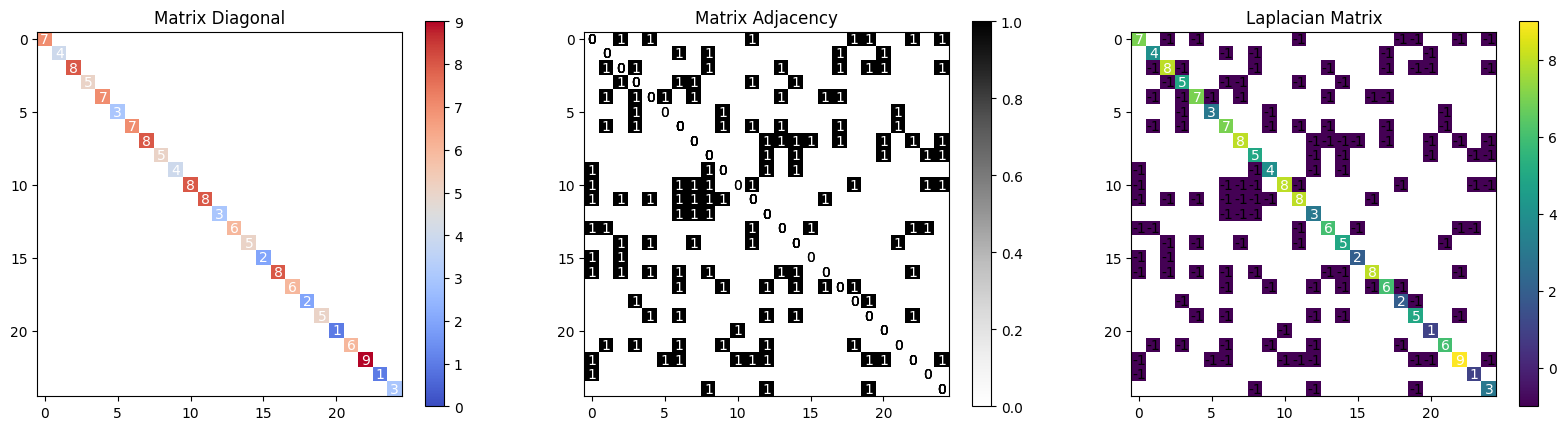

2024-12-12 00:27:14,587:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


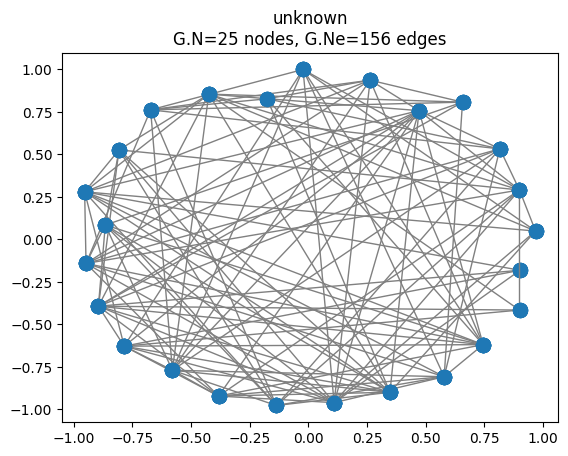

In [119]:
plot_matrices(D, A, L)
GL.set_coordinates()
GL.plot()


In [120]:
n = 10
D_b = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            degree = n-i-1
            D_b[i,j] = degree

A_b = np.zeros((n,n))
for i in range(n):
    degree = int(D_b[i,i])
    links_created = 0
    while links_created < degree:
        link = rs.randint(0, n)
        if link != i and A_b[i, link] == 0:
            A_b[i, link] = 1
            links_created += 1

L_b = D_b - A_b
GL_b = graphs.Graph(L_b)


2024-12-12 00:27:14,828:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


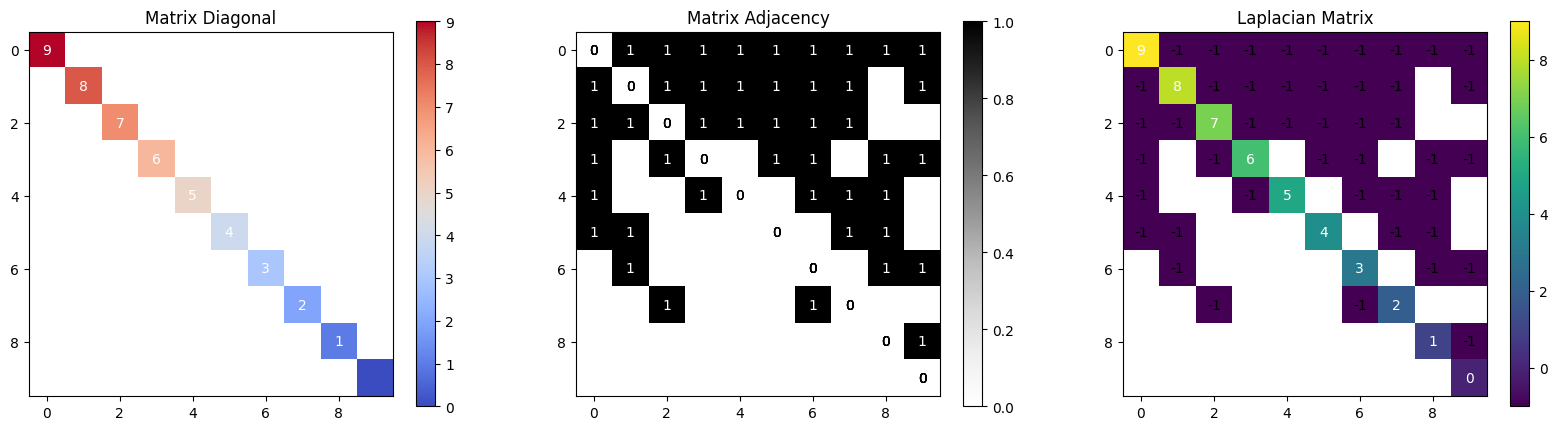

2024-12-12 00:27:15,397:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


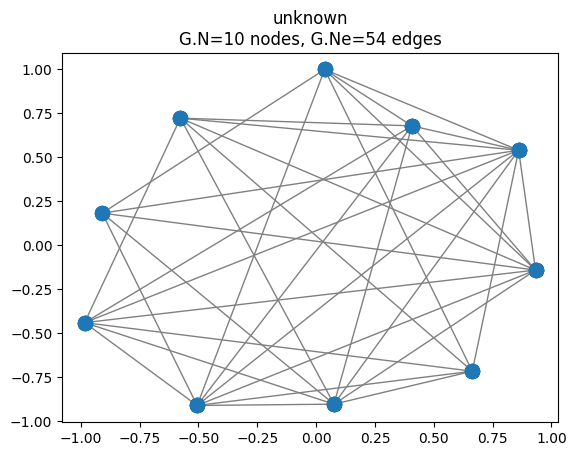

In [121]:
plot_matrices(D_b, A_b, L_b)
GL_b.set_coordinates()
GL_b.plot()

In [122]:
GL.is_connected()

False